In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def load_metric_matrix(base_output_folder, metric_file_name):
    """
    Loads the recall values from each run folder under base_output_folder
    and returns a 2D NumPy array of shape (n_runs, n_snapshots).

    Parameters:
    - base_output_folder (str): Path to the folder containing run_* subfolders.

    Returns:
    - np.ndarray: A 2D array with shape (n_runs, n_snapshots)
    """
    run_folders = sorted([
        f for f in os.listdir(base_output_folder)
        if os.path.isdir(os.path.join(base_output_folder, f)) and f.startswith("run_")
    ])

    recall_matrix = []

    for run_folder in run_folders:
        # path = os.path.join(base_output_folder, run_folder, "rbo.txt")
        path = os.path.join(base_output_folder, run_folder, metric_file_name)
        recalls = []
        with open(path, "r") as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) == 2:
                    _, pr = parts
                    recalls.append(float(pr))
        recall_matrix.append(recalls)

    return np.array(recall_matrix)

In [ ]:
def run_analysis_over_c(base_dir, c_values, analysis_fn):
    """
    Runs a given analysis function over multiple values of c.

    Parameters:
    - base_dir (str): Path to the folder containing 'c{value}' subfolders.
    - c_values (list of int): Values of c to iterate over.
    - analysis_fn (function): A function that takes a recall matrix as input and prints or returns analysis results.
    """
    for c in c_values:
        print(f"\n=== Results for c = {c} ===")
        folder = os.path.join(base_dir, f"c{c}")
        recall_matrix = load_metric_matrix(folder)
        analysis_fn(recall_matrix)


In [ ]:
def analyze_recall_matrix(recall_matrix):
    """
    Analyzes the recall matrix by computing:
    - Average recall across snapshots for each run
    - Mean, sample standard deviation, and sample variance of these averages across runs

    Parameters:
    - recall_matrix (np.ndarray): A 2D array of shape (n_runs, n_snapshots)

    Prints:
    - Mean of average recalls across runs
    - Sample standard deviation of average recalls across runs
    - Sample variance of average recalls across runs
    """
    per_run_avg = recall_matrix.mean(axis=1)
    mean_of_avgs = per_run_avg.mean()
    # We are normalizing by (n-1) instead of n. Is this what we should do in our case?
    std_of_avgs = per_run_avg.std(ddof=1)
    var_of_avgs = per_run_avg.var(ddof=1)

    print(f"Mean of per-run average recalls: {mean_of_avgs:.6f}")
    print(f"Sample standard deviation:            {std_of_avgs:.6f}")
    print(f"Sample variance:                      {var_of_avgs:.6f}")

In [ ]:
def analyze_recall_matrix_by_snapshot(recall_matrix):
    """
    Analyzes the recall matrix snapshot-wise:
    - For each snapshot, computes mean, sample std, and sample var across runs
    - Averages those statistics across all snapshots

    Parameters:
    - recall_matrix (np.ndarray): Shape (n_runs, n_snapshots)

    Prints:
    - Average mean recall across snapshots
    - Average sample std across snapshots
    - Average sample var across snapshots
    """
    snapshot_means = recall_matrix.mean(axis=0)
    snapshot_stds = recall_matrix.std(axis=0, ddof=1)
    snapshot_vars = recall_matrix.var(axis=0, ddof=1)

    mean_of_snapshot_means = snapshot_means.mean()
    mean_of_snapshot_stds = snapshot_stds.mean()
    mean_of_snapshot_vars = snapshot_vars.mean()

    print(f"Mean of snapshot means:             {mean_of_snapshot_means:.6f}")
    print(f"Mean of snapshot sample stds:       {mean_of_snapshot_stds:.6f}")
    print(f"Mean of snapshot sample variances:  {mean_of_snapshot_vars:.6f}")


In [ ]:
def plot_snapshot_recall_from_folder(folder_path, label=None, color=None, marker='o'):
    """
    Loads recall matrix from a given folder and plots mean ± std with markers at each snapshot.

    Parameters:
    - folder_path (str): Path to folder (e.g., .../c1)
    - label (str): Label for plot legend
    - color (str): Optional matplotlib color
    - marker (str): Marker style for data points (e.g., 'o', '^', 's', 'x')
    """
    recall_matrix = load_metric_matrix(folder_path)

    snapshot_means = recall_matrix.mean(axis=0)
    snapshot_stds = recall_matrix.std(axis=0, ddof=1)
    snapshots = np.arange(len(snapshot_means))

    # Line + markers
    plt.plot(snapshots, snapshot_means, label=label, color=color, marker=marker, markersize=4, linewidth=1.5)
    
    # Shaded region = mean ± std
    plt.fill_between(snapshots,
                     snapshot_means - snapshot_stds,
                     snapshot_means + snapshot_stds,
                     alpha=0.3,
                     color=color)

    plt.xlabel("Snapshot Index")
    plt.ylabel("recall @ n̄")
    plt.title("Per-Snapshot recall with Std Dev")
    plt.grid(True)
    # Fix the y axis to be between 0 and 1
    plt.ylim(0, 1)


# Average over runs first


In [ ]:
base_dir = "/home/nikolabulat/Snapshot_Update/Tonic/preliminary_analysis/outputs/as_caida_122_uss_50_trials_cpp"
run_analysis_over_c(base_dir, [1, 2, 3], analyze_recall_matrix)

In [ ]:
base_dir = "/home/nikolabulat/Snapshot_Update/Tonic/preliminary_analysis/outputs/as_733_uss_50_trials_cpp"
run_analysis_over_c(base_dir, [1, 2, 3], analyze_recall_matrix)

# Average over snapshots first (fine-grained)

In [ ]:
base_dir = "/home/nikolabulat/Snapshot_Update/Tonic/preliminary_analysis/outputs/as_caida_122_uss_50_trials"
run_analysis_over_c(base_dir, [1, 2, 3, 4, 5], analyze_recall_matrix_by_snapshot)

In [ ]:
base_dir = "/home/nikolabulat/Snapshot_Update/Tonic/preliminary_analysis/outputs/as_733_uss_50_trials"
run_analysis_over_c(base_dir, [1, 2, 3, 4, 5], analyze_recall_matrix_by_snapshot)

In [ ]:
base_dir = "/home/nikolabulat/Snapshot_Update/Tonic/preliminary_analysis/outputs/oregon1_uss_50_trials"
run_analysis_over_c(base_dir, [1, 2, 3, 4, 5], analyze_recall_matrix_by_snapshot)

# Plotting the fine-grained analysis

In [ ]:
base_dir = "/home/nikolabulat/Snapshot_Update/Tonic/preliminary_analysis/outputs/as_caida_122_uss_50_trials"
c_values = [1, 2, 3, 4, 5]
colors = ['blue', 'green', 'orange', 'red', 'purple']
markers = ['o', '^', 's', 'd', 'v']

plt.figure(figsize=(10, 5))
for c, color, marker in zip(c_values, colors, markers):
    folder = os.path.join(base_dir, f"c{c}")
    plot_snapshot_recall_from_folder(folder, label=f"c = {c}", color=color, marker=marker)

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
base_dir = "/home/nikolabulat/Snapshot_Update/Tonic/preliminary_analysis/outputs/as_733_uss_50_trials"
c_values = [1, 2, 3, 4, 5]
colors = ['blue', 'green', 'orange', 'red', 'purple']
markers = ['o', '^', 's', 'd', 'v']

plt.figure(figsize=(10, 5))
for c, color, marker in zip(c_values, colors, markers):
    folder = os.path.join(base_dir, f"c{c}")
    plot_snapshot_recall_from_folder(folder, label=f"c = {c}", color=color, marker=marker)

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
base_dir = "/home/nikolabulat/Snapshot_Update/Tonic/preliminary_analysis/outputs/oregon1_uss_50_trials"
c_values = [1, 2, 3, 4, 5]
colors = ['blue', 'green', 'orange', 'red', 'purple']
markers = ['o', '^', 's', 'd', 'v']

plt.figure(figsize=(10, 5))
for c, color, marker in zip(c_values, colors, markers):
    folder = os.path.join(base_dir, f"c{c}")
    plot_snapshot_recall_from_folder(folder, label=f"c = {c}", color=color, marker=marker)

plt.legend()
plt.tight_layout()
plt.show()

# Fixed predictor evaluation

In [ ]:
def plot_fixed_predictor_recall(run_folder, label=None, color='black', marker='o'):
    """
    Plots per-snapshot recall for fixed predictor (no variance).
    
    Parameters:
    - run_folder (str): Path to the 'run' folder containing recall_values.txt
    - label (str): Legend label
    - color (str): Line color
    - marker (str): Marker style
    """
    # recall_path = os.path.join(run_folder, "recall_values.txt")
    recall_path = os.path.join(run_folder, "recall_values.txt")
    snapshot_indices = []
    recall_values = []

    with open(recall_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) == 2:
                idx, val = int(parts[0]), float(parts[1])
                snapshot_indices.append(idx)
                recall_values.append(val)

    plt.plot(snapshot_indices, recall_values, label=label, color=color,
             marker=marker, markersize=4, linewidth=1.5)

    plt.xlabel("Snapshot Index")
    plt.ylabel("recall @ n̄")
    plt.title("Per-Snapshot Recall (Fixed Predictor)")
    plt.grid(True)
    if label:
        plt.legend()
    plt.tight_layout()
    plt.ylim(0, 1)
    plt.show()


In [ ]:
plot_fixed_predictor_recall(
    run_folder="/home/nikolabulat/Snapshot_Update/Tonic/preliminary_analysis/outputs/as_733_fixed_predictor/run",
    label="Fixed Predictor"
)

In [ ]:
plot_fixed_predictor_recall(
    run_folder="/home/nikolabulat/Snapshot_Update/Tonic/preliminary_analysis/outputs/as_caida_122_fixed_predictor/run",
    label="Fixed Predictor"
)

In [ ]:
plot_fixed_predictor_recall(
    run_folder="/home/nikolabulat/Snapshot_Update/Tonic/preliminary_analysis/outputs/oregon1_fixed_predictor/run",
    label="Fixed Predictor"
)

# Fixed vs One Behind

In [7]:
import os
import matplotlib.pyplot as plt

def plot_metric_comparison(fixed_run_folder, shifted_run_folder, metric_filename, label_fixed="Fixed", label_shifted="Shifted", ylabel=None):
    """
    Compare a metric (recall, RBO, etc.) between fixed and shifted predictors.

    Parameters:
    - fixed_run_folder (str): Path to the fixed predictor run folder
    - shifted_run_folder (str): Path to the shifted predictor run folder
    - metric_filename (str): Name of the metric file (e.g., 'recall_values.txt')
    - label_fixed (str): Label for fixed predictor
    - label_shifted (str): Label for shifted predictor
    - ylabel (str): Label for y-axis (optional)
    """
    def load_metric(filepath):
        indices, values = [], []
        with open(filepath, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) == 2:
                    idx, val = int(parts[0]), float(parts[1])
                    indices.append(idx)
                    values.append(val)
        return indices, values

    # Load data
    fixed_path = os.path.join(fixed_run_folder, metric_filename)
    shifted_path = os.path.join(shifted_run_folder, metric_filename)

    fixed_idx, fixed_vals = load_metric(fixed_path)
    shifted_idx, shifted_vals = load_metric(shifted_path)

    # Align indices (start from 1)
    fixed_idx = fixed_idx[1:]
    fixed_vals = fixed_vals[1:]

    plt.plot(fixed_idx, fixed_vals, label=label_fixed, color='black', marker='o', linewidth=1.5, markersize=4)
    plt.plot(shifted_idx, shifted_vals, label=label_shifted, color='tab:red', marker='s', linewidth=1.5, markersize=4)

    plt.xlabel("Snapshot Index")
    plt.ylabel(ylabel if ylabel else metric_filename.replace("_", " ").replace(".txt", "").title())
    plt.title(f"Comparison of {ylabel or metric_filename}")
    plt.grid(True)
    plt.legend()
    plt.ylim(0, 1)
    plt.yticks([i/10 for i in range(11)])
    plt.tight_layout()
    plt.show()


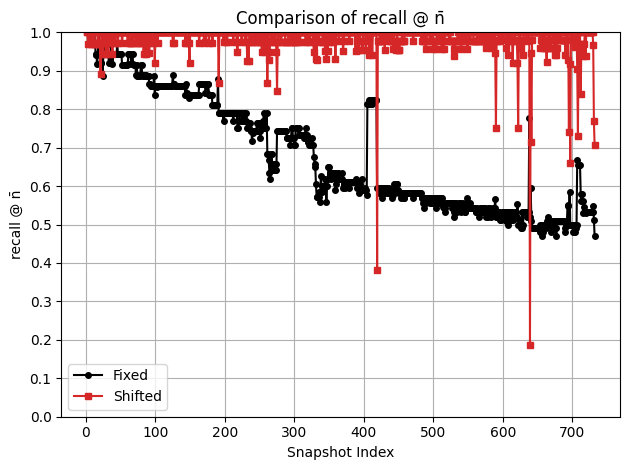

In [16]:
plot_metric_comparison(
    fixed_run_folder="/home/nikolabulat/Snapshot_Update/Tonic/preliminary_analysis/outputs/as_733_fixed_predictor/run",
    shifted_run_folder="/home/nikolabulat/Snapshot_Update/Tonic/preliminary_analysis/outputs/as_733_one_before_predictor/run",
    metric_filename="recall.txt",
    ylabel="recall @ n̄"
)

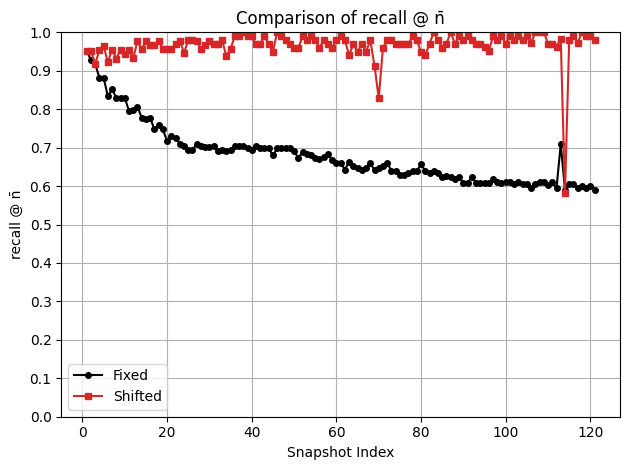

In [17]:
plot_metric_comparison(
    fixed_run_folder="/home/nikolabulat/Snapshot_Update/Tonic/preliminary_analysis/outputs/as_caida_122_fixed_predictor/run",
    shifted_run_folder="/home/nikolabulat/Snapshot_Update/Tonic/preliminary_analysis/outputs/as_caida_122_one_before_predictor/run",
    metric_filename="recall.txt",
    ylabel="recall @ n̄"
)

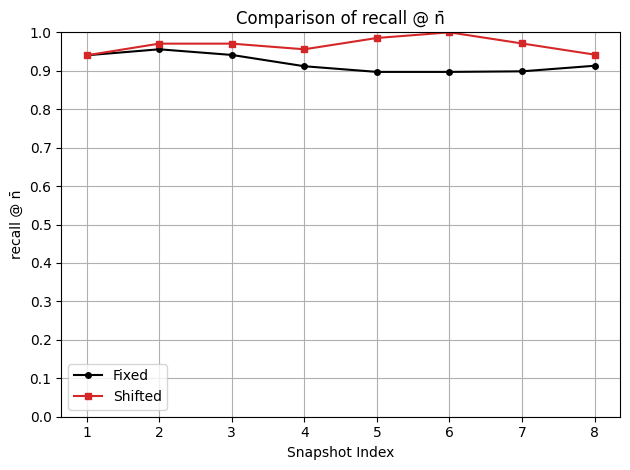

In [18]:
plot_metric_comparison(
    fixed_run_folder="/home/nikolabulat/Snapshot_Update/Tonic/preliminary_analysis/outputs/oregon1_fixed_predictor/run",
    shifted_run_folder="/home/nikolabulat/Snapshot_Update/Tonic/preliminary_analysis/outputs/oregon1_one_before_predictor/run",
    metric_filename="recall.txt",
    ylabel="recall @ n̄"
)

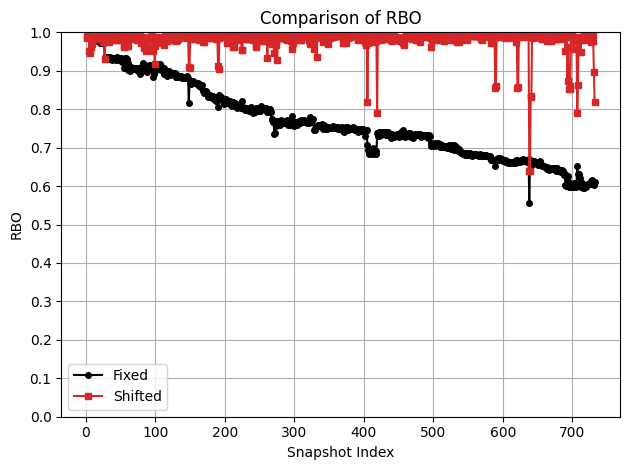

In [12]:
plot_metric_comparison(
    fixed_run_folder="/home/nikolabulat/Snapshot_Update/Tonic/preliminary_analysis/outputs/as_733_fixed_predictor/run",
    shifted_run_folder="/home/nikolabulat/Snapshot_Update/Tonic/preliminary_analysis/outputs/as_733_one_before_predictor/run",
    metric_filename="rbo.txt",
    ylabel="RBO"
)

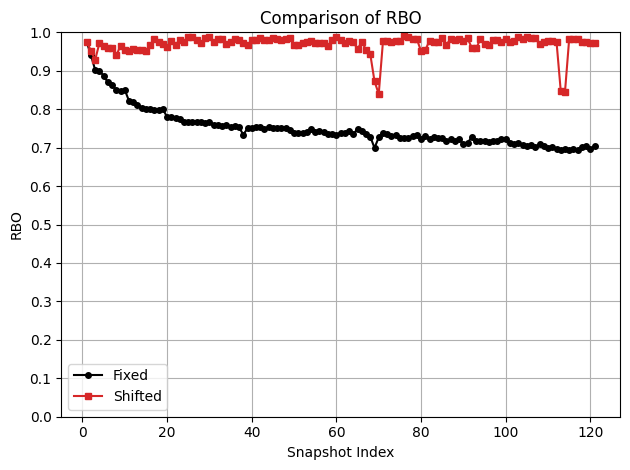

In [13]:
plot_metric_comparison(
    fixed_run_folder="/home/nikolabulat/Snapshot_Update/Tonic/preliminary_analysis/outputs/as_caida_122_fixed_predictor/run",
    shifted_run_folder="/home/nikolabulat/Snapshot_Update/Tonic/preliminary_analysis/outputs/as_caida_122_one_before_predictor/run",
    metric_filename="rbo.txt",
    ylabel="RBO"
)

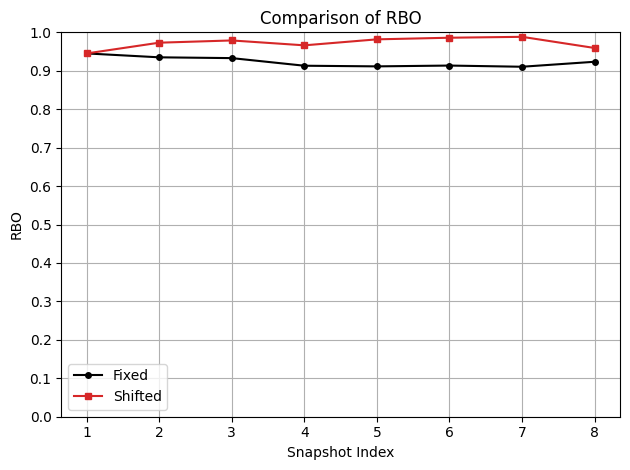

In [14]:
plot_metric_comparison(
    fixed_run_folder="/home/nikolabulat/Snapshot_Update/Tonic/preliminary_analysis/outputs/oregon1_fixed_predictor/run",
    shifted_run_folder="/home/nikolabulat/Snapshot_Update/Tonic/preliminary_analysis/outputs/oregon1_one_before_predictor/run",
    metric_filename="rbo.txt",
    ylabel="RBO"
)

# Fixed and USS together

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def load_metric_matrix(base_output_folder, metric_file_name):
    """
    Loads the recall values from each run folder under base_output_folder
    and returns a 2D NumPy array of shape (n_runs, n_snapshots).

    Parameters:
    - base_output_folder (str): Path to the folder containing run_* subfolders.

    Returns:
    - np.ndarray: A 2D array with shape (n_runs, n_snapshots)
    """
    run_folders = sorted([
        f for f in os.listdir(base_output_folder)
        if os.path.isdir(os.path.join(base_output_folder, f)) and f.startswith("run_")
    ])

    recall_matrix = []

    for run_folder in run_folders:
        # path = os.path.join(base_output_folder, run_folder, "rbo.txt")
        path = os.path.join(base_output_folder, run_folder, metric_file_name)
        recalls = []
        with open(path, "r") as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) == 2:
                    _, pr = parts
                    recalls.append(float(pr))
        recall_matrix.append(recalls)

    return np.array(recall_matrix)

In [ ]:
def plot_all_with_fixed(base_dir_uss, fixed_run_folder, c_values, metric_file_name):
    colors = ['blue', 'green', 'orange', 'red', 'purple', 'black']
    markers = ['o', '^', 's', 'd', 'v', 'x']

    plt.figure(figsize=(10, 5))

    # Plot USS recall curves
    for i, c in enumerate(c_values):
        folder = os.path.join(base_dir_uss, f"c{c}")
        recall_matrix = load_metric_matrix(folder, metric_file_name)
        means = recall_matrix.mean(axis=0)
        stds = recall_matrix.std(axis=0, ddof=1)
        x = np.arange(len(means))

        plt.plot(x, means, label=f"USS (c={c})", color=colors[i], marker=markers[i],
                 linewidth=1.5, markersize=4)
        plt.fill_between(x, means - stds, means + stds, color=colors[i], alpha=0.3)

    # Plot Fixed Predictor
    fixed_path = os.path.join(fixed_run_folder, metric_file_name)
    fixed_x = []
    fixed_vals = []
    with open(fixed_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) == 2:
                idx, val = int(parts[0]), float(parts[1])
                fixed_x.append(idx)
                fixed_vals.append(val)

    plt.plot(fixed_x, fixed_vals, label="Fixed Predictor", color=colors[-1],
             marker=markers[-1], linestyle='--', linewidth=2)

    # Final formatting
    plt.xlabel("Snapshot Index")
    plt.ylabel("recall @ n̄")
    plt.title("USS vs Fixed Predictor — Per-Snapshot Recall")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.ylim(0, 1)
    plt.yticks(np.arange(0.0, 1.1, 0.1))
    plt.show()


In [ ]:
base_dir_uss = "/home/nikolabulat/Snapshot_Update/Tonic/preliminary_analysis/outputs/as_caida_122_uss_50_trials"
fixed_run_folder = "/home/nikolabulat/Snapshot_Update/Tonic/preliminary_analysis/outputs/as_caida_122_fixed_predictor/run"
c_values = [1, 2, 3, 4, 5]

plot_all_with_fixed(base_dir_uss, fixed_run_folder, c_values, "recall.txt")


In [ ]:
base_dir_uss = "/home/nikolabulat/Snapshot_Update/Tonic/preliminary_analysis/outputs/as_733_uss_50_trials"
fixed_run_folder = "/home/nikolabulat/Snapshot_Update/Tonic/preliminary_analysis/outputs/as_733_fixed_predictor/run"
c_values = [1, 2, 3, 4, 5]

plot_all_with_fixed(base_dir_uss, fixed_run_folder, c_values, "recall.txt")

In [ ]:
base_dir_uss = "/home/nikolabulat/Snapshot_Update/Tonic/preliminary_analysis/outputs/oregon1_uss_50_trials"
fixed_run_folder = "/home/nikolabulat/Snapshot_Update/Tonic/preliminary_analysis/outputs/oregon1_fixed_predictor/run"
c_values = [1, 2, 3, 4, 5]

plot_all_with_fixed(base_dir_uss, fixed_run_folder, c_values, "recall.txt")